In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
from util import *
import numpy as np

## sine波の重ね合わせ
音は複数の周波数成分を含んでおり，複数の$sine$波を重ね合わせることで表現できる．  

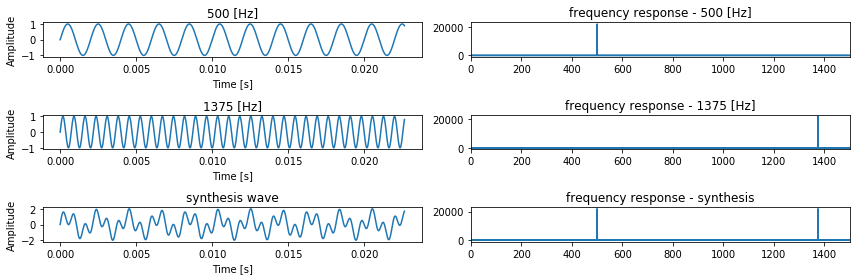

In [3]:
# 各sine波の生成
sr = 44100
t = np.arange(0, 1, 1/sr)
s_500 = sine_wave(500)
s_1375 = sine_wave(1375)
synth = s_500 + s_1375  # 合成波

# 周波数特性
amp_500, fr_500 = frequency_response(s_500)
amp_1375, fr_1375 = frequency_response(s_1375)
amp_synth, fr_synth = frequency_response(synth)

# プロット
plt.figure(figsize=(12, 4))
plt.subplot(321)
plot_signal(t, s_500, '500 [Hz]')
plt.subplot(322)
plot_normal(fr_500, amp_500, 'frequency response - 500 [Hz]')
plt.xlim(0, 1500)

plt.subplot(323)
plot_signal(t, s_1375, '1375 [Hz]')
plt.subplot(324)
plot_normal(fr_1375, amp_1375, 'frequency response - 1375 [Hz]')
plt.xlim(0, 1500)

plt.subplot(325)
plot_signal(t, synth, 'synthesis wave')
plt.subplot(326)
plot_normal(fr_synth, amp_synth, 'frequency response - synthesis')
plt.xlim(0, 1500)

plt.tight_layout()
plt.show()

In [11]:
display.Audio(synth, rate=sr)

### 周期的複合音
単純な$sine$波はただ一つの周波数成分しか含まないため**純音**と呼ばれる．これに対して，複数の$sine$波を重ね合わせたものは複数の周波数成分を含んでいることから**複合音**と呼ばれる．その中でも周波数成分が整数倍の関係になる**倍音**構造を示すものは，波形が周期的になるため**周期的複合音**と呼ばれる．

基本音だけではおとなしく聞こえる音色も，倍音を増やしていくことによってしだいに明るくなる．基本音は**音の高さ**，倍音の配合率は**音色**に対応する．

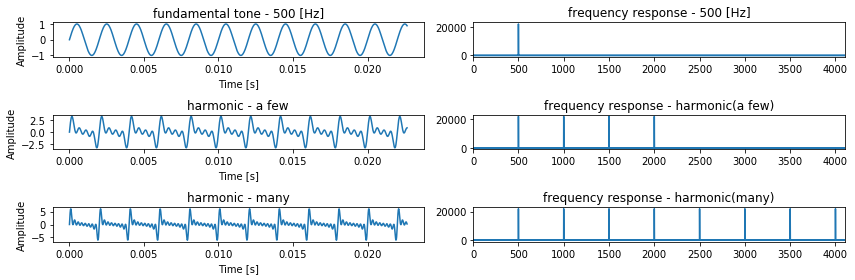

In [11]:
harmonic = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]

# 周期的複合音
synth1 = np.zeros([44100])
for i in harmonic[:4]:
    wave = sine_wave(i)
    synth1 += wave
amp_synth1, fr_synth1 = frequency_response(synth1)

synth2 = np.zeros([44100])
for i in harmonic:
    wave = sine_wave(i)
    synth2 += wave
amp_synth2, fr_synth2 = frequency_response(synth2)

# プロット
plt.figure(figsize=(12, 4))
plt.subplot(321)
plot_signal(t, s_500, 'fundamental tone - 500 [Hz]')
plt.subplot(322)
plot_normal(fr_500, amp_500, 'frequency response - 500 [Hz]')
plt.xlim(0, 4100)

plt.subplot(323)
plot_signal(t, synth1, 'harmonic - a few')
plt.subplot(324)
plot_normal(fr_synth1, amp_synth1, 'frequency response - harmonic(a few)')
plt.xlim(0, 4100)

plt.subplot(325)
plot_signal(t, synth2, 'harmonic - many')
plt.subplot(326)
plot_normal(fr_synth2, amp_synth2, 'frequency response - harmonic(many)')
plt.xlim(0, 4100)

plt.tight_layout()
plt.show()

In [12]:
display.Audio(s_500, rate=sr)  # 基本音

In [14]:
display.Audio(synth1, rate=sr)  # 倍音(少な目)

In [15]:
display.Audio(synth2, rate=sr)  # 倍音(多め)，明るく聞こえる